In [ ]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 1 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 23.58 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (1048/1048), done.


In [ ]:
!unzip '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

Archive:  /content/COVID-CT/Images-processed/CT_COVID.zip
   creating: CT_COVID/
  inflating: CT_COVID/2020.03.01.20029769-p21-73_1%1.png  
   creating: __MACOSX/
   creating: __MACOSX/CT_COVID/
  inflating: __MACOSX/CT_COVID/._2020.03.01.20029769-p21-73_1%1.png  
  inflating: CT_COVID/Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: __MACOSX/CT_COVID/._Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: CT_COVID/2020.03.12.20034686-p17-91-4.png  
  inflating: __MACOSX/CT_COVID/._2020.03.12.20034686-p17-91-4.png  
  inflating: CT_COVID/2020.02.25.20021568-p24-111%8.png  
  inflating: __MACOSX/CT_COVID/._2020.02.25.20021568-p24-111%8.png  
  inflating: CT_COVID/2020.03.13.20035212-p23-153.png  
  inflating: __MACOSX/CT_COVID/._2020.03.13.20035212-p23-153.png  
  inflating: CT_COVID/2020.03.21.20040691-p18-6-6.png  
  inflating: __MACOSX/CT_COVID/._2020.03.21.20040691-p18-6-6.png  


In [ ]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="covid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="noncovid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

In [ ]:
# Initiate base directory
base_dir = '/content/covid19_CT'
os.mkdir(base_dir)

In [ ]:
# Create directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'noncovid')
os.mkdir(test_noncovid_dir)

In [ ]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'

import shutil
fnames = ['covid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training Covid images:', len(os.listdir(train_covid_dir)))
print('total training NonCovid images:', len(os.listdir(train_noncovid_dir)))

print('total validation Covid images:', len(os.listdir(validation_covid_dir)))
print('total validation NonCovid images:', len(os.listdir(validation_noncovid_dir)))

print('total test Covid images:', len(os.listdir(test_covid_dir)))
print('total test NonCovid images:', len(os.listdir(test_noncovid_dir)))

total training Covid images: 250
total training NonCovid images: 250
total validation Covid images: 50
total validation NonCovid images: 50
total test Covid images: 48
total test NonCovid images: 48


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=16,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=16,
                                                        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
# Fit the model 
history = model.fit_generator(train_generator,
                              
                              epochs=30,
                              validation_data=validation_generator,
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
32/32 [==============================] - 13s 91ms/step - loss: 0.6851 - acc: 0.5500 - val_loss: 0.7109 - val_acc: 0.5000
Epoch 2/30
32/32 [==============================] - 3s 82ms/step - loss: 0.6532 - acc: 0.6260 - val_loss: 0.6405 - val_acc: 0.6100
Epoch 3/30
32/32 [==============================] - 3s 84ms/step - loss: 0.6071 - acc: 0.6680 - val_loss: 0.6408 - val_acc: 0.5800
Epoch 4/30
32/32 [==============================] - 3s 82ms/step - loss: 0.5858 - acc: 0.6860 - val_loss: 0.5983 - val_acc: 0.6700
Epoch 5/30
32/32 [==============================] - 3s 80ms/step - loss: 0.5519 - acc: 0.7200 - val_loss: 0.5945 - val_acc: 0.6600
Epoch 6/30
32/32 [==============================] - 3s 82ms/step - loss: 0.5103 - acc: 0.7540 - val_loss: 0.5841 - val_acc: 0.7000
Epoch 7/30
32/32 [==============================] - 3s 83ms/step - loss: 0.4897 - acc: 0.7600 - val_loss: 0.6134 - val_acc: 0.7000
Epoch 8/30
32/32 [==============================] - 3s 81ms/step - loss: 0.4601 - 

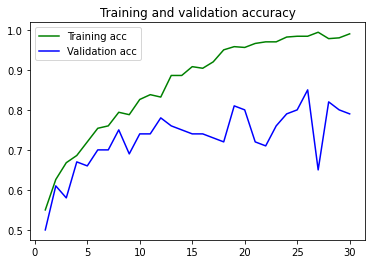

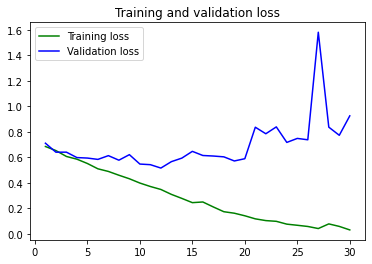

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

history = model1.fit_generator(train_generator,
                              
                              epochs=30,
                              validation_data=validation_generator,
                              )

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


50/50 [==============================] - 6s 101ms/step - loss: 0.7016 - acc: 0.4820 - val_loss: 0.6881 - val_acc: 0.5700
Epoch 2/30
50/50 [==============================] - 5s 96ms/step - loss: 0.6893 - acc: 0.5400 - val_loss: 0.6794 - val_acc: 0.5600
Epoch 3/30
50/50 [==============================] - 5s 94ms/step - loss: 0.6905 - acc: 0.5460 - val_loss: 0.6792 - val_acc: 0.5500
Epoch 4/30
50/50 [==============================] - 5s 96ms/step - loss: 0.6773 - acc: 0.5660 - val_loss: 0.6769 - val_acc: 0.5600
Epoch 5/30
50/50 [==============================] - 5s 95ms/step - loss: 0.6662 - acc: 0.5920 - val_loss: 0.8099 - val_acc: 0.5000
Epoch 6/30
50/50 [==============================] - 5s 95ms/step - loss: 0.6723 - acc: 0.5900 - val_loss: 0.6704 - val_acc: 0.5700
Epoch 7/30
50/50 [==============================] - 5s 94ms/step - loss: 0.6634 - acc: 0.5740 - val_loss: 0.6601 - val_acc: 0.5500
Epoch 8/30
50/50 [==============================] - 5s 96ms/step - loss: 0.6610 - acc: 0.6100

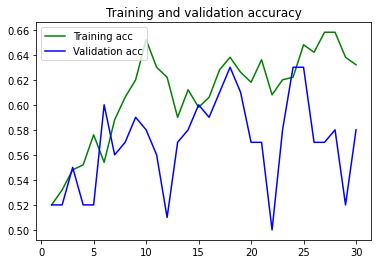

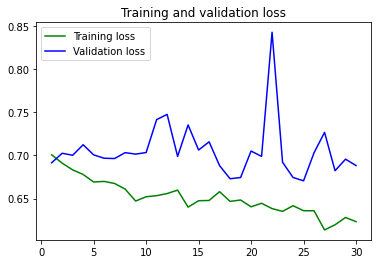

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              
                              epochs=30,
                              validation_data=validation_generator,
                              )

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


50/50 [==============================] - 19s 389ms/step - loss: 0.9430 - acc: 0.5720 - val_loss: 0.6092 - val_acc: 0.6300
Epoch 2/30
50/50 [==============================] - 19s 388ms/step - loss: 0.6794 - acc: 0.5760 - val_loss: 0.6391 - val_acc: 0.6200
Epoch 3/30
50/50 [==============================] - 20s 403ms/step - loss: 0.6826 - acc: 0.5980 - val_loss: 0.6430 - val_acc: 0.6400
Epoch 4/30
50/50 [==============================] - 19s 386ms/step - loss: 0.6670 - acc: 0.5840 - val_loss: 0.6560 - val_acc: 0.6200
Epoch 5/30
50/50 [==============================] - 19s 386ms/step - loss: 0.6638 - acc: 0.6120 - val_loss: 0.6744 - val_acc: 0.5600
Epoch 6/30
50/50 [==============================] - 19s 386ms/step - loss: 0.6531 - acc: 0.6040 - val_loss: 0.6773 - val_acc: 0.5700
Epoch 7/30
50/50 [==============================] - 19s 384ms/step - loss: 0.6546 - acc: 0.6040 - val_loss: 0.6642 - val_acc: 0.5900
Epoch 8/30
50/50 [==============================] - 19s 384ms/step - loss: 0.647

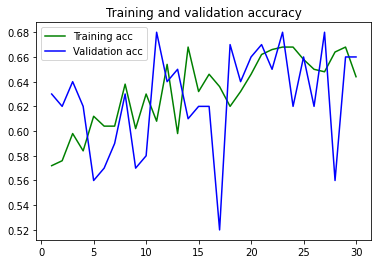

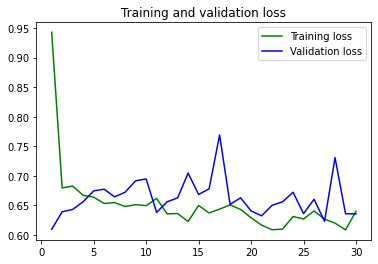

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=90,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              
                              epochs=30,
                              validation_data=validation_generator,
                              )

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


50/50 [==============================] - 21s 424ms/step - loss: 0.6159 - acc: 0.6660 - val_loss: 0.7151 - val_acc: 0.5800
Epoch 2/30
50/50 [==============================] - 19s 385ms/step - loss: 0.6280 - acc: 0.6560 - val_loss: 0.6691 - val_acc: 0.5700
Epoch 3/30
50/50 [==============================] - 19s 386ms/step - loss: 0.6344 - acc: 0.6360 - val_loss: 0.6335 - val_acc: 0.6000
Epoch 4/30
50/50 [==============================] - 19s 386ms/step - loss: 0.6150 - acc: 0.6860 - val_loss: 0.6360 - val_acc: 0.6700
Epoch 5/30
50/50 [==============================] - 19s 386ms/step - loss: 0.6124 - acc: 0.6860 - val_loss: 0.6481 - val_acc: 0.6700
Epoch 6/30
50/50 [==============================] - 19s 386ms/step - loss: 0.6240 - acc: 0.6320 - val_loss: 0.6327 - val_acc: 0.6500
Epoch 7/30
50/50 [==============================] - 19s 387ms/step - loss: 0.6211 - acc: 0.6660 - val_loss: 0.6174 - val_acc: 0.6900
Epoch 8/30
50/50 [==============================] - 19s 385ms/step - loss: 0.641

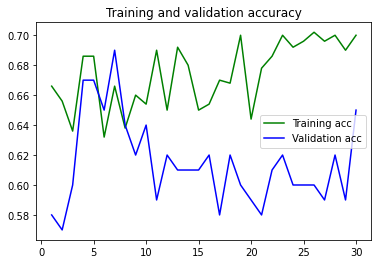

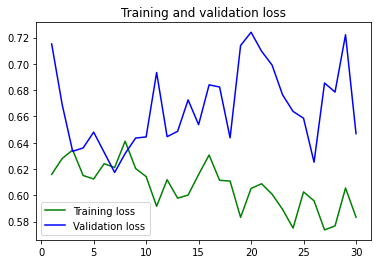

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=135,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              
                              epochs=30,
                              validation_data=validation_generator,
                              )

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


50/50 [==============================] - 20s 392ms/step - loss: 0.5934 - acc: 0.6660 - val_loss: 0.7129 - val_acc: 0.6700
Epoch 2/30
50/50 [==============================] - 19s 387ms/step - loss: 0.5916 - acc: 0.7040 - val_loss: 0.6906 - val_acc: 0.6000
Epoch 3/30
50/50 [==============================] - 19s 388ms/step - loss: 0.5927 - acc: 0.7020 - val_loss: 0.6989 - val_acc: 0.6000
Epoch 4/30
50/50 [==============================] - 19s 386ms/step - loss: 0.5901 - acc: 0.7120 - val_loss: 0.6391 - val_acc: 0.6100
Epoch 5/30
50/50 [==============================] - 19s 388ms/step - loss: 0.5767 - acc: 0.7060 - val_loss: 0.7009 - val_acc: 0.5900
Epoch 6/30
50/50 [==============================] - 19s 387ms/step - loss: 0.5969 - acc: 0.6640 - val_loss: 0.7451 - val_acc: 0.5600
Epoch 7/30
50/50 [==============================] - 19s 385ms/step - loss: 0.5701 - acc: 0.7080 - val_loss: 0.6314 - val_acc: 0.6200
Epoch 8/30
50/50 [==============================] - 19s 386ms/step - loss: 0.558

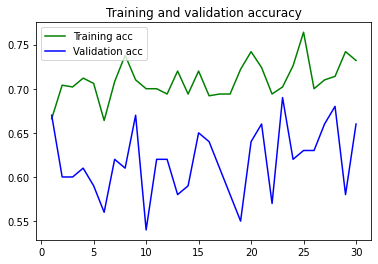

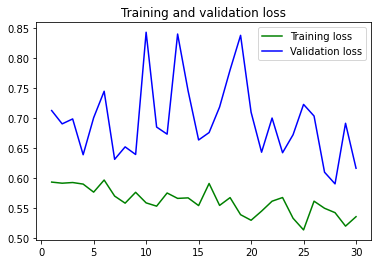

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=180,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              
                              epochs=30,
                              validation_data=validation_generator,
                              )

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


50/50 [==============================] - 19s 388ms/step - loss: 0.5377 - acc: 0.7120 - val_loss: 0.8214 - val_acc: 0.5900
Epoch 2/30
50/50 [==============================] - 19s 386ms/step - loss: 0.5455 - acc: 0.7080 - val_loss: 0.6974 - val_acc: 0.6400
Epoch 3/30
50/50 [==============================] - 19s 386ms/step - loss: 0.5182 - acc: 0.7440 - val_loss: 0.7421 - val_acc: 0.6500
Epoch 4/30
50/50 [==============================] - 19s 386ms/step - loss: 0.5408 - acc: 0.7100 - val_loss: 0.6241 - val_acc: 0.7000
Epoch 5/30
50/50 [==============================] - 19s 386ms/step - loss: 0.5666 - acc: 0.7040 - val_loss: 0.8175 - val_acc: 0.6000
Epoch 6/30
50/50 [==============================] - 19s 386ms/step - loss: 0.5378 - acc: 0.7160 - val_loss: 0.6204 - val_acc: 0.6800
Epoch 7/30
50/50 [==============================] - 19s 386ms/step - loss: 0.5142 - acc: 0.7180 - val_loss: 0.6284 - val_acc: 0.6700
Epoch 8/30
50/50 [==============================] - 19s 388ms/step - loss: 0.535

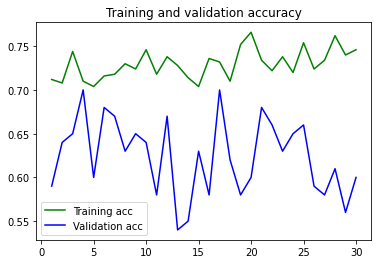

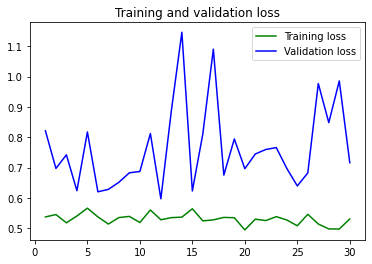

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()